In [147]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [148]:
Rating=pd.read_csv("E:/MoviesLensDataset/ml-1m/ratings.dat",sep="::",engine='python',names=["UserId","MovieIDs","Rating","Timestamp"],
                   dtype={"UserId":"int32","MovieIDs":"int32","Rating":"int32","Timestamp":"int32"})

#print(Rating.head())
#print(Rating.describe())

All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings

In [149]:
Users=pd.read_csv("E:/MoviesLensDataset/ml-1m/users.dat",sep="::",engine='python',names=['UserId','Gender','Age','Occupation','Zip-code'])

#print(Users.head())
#print(Users.describe())

User information is in the file "users.dat" and is in the following
format:
UserID::Gender::Age::Occupation::Zip-code
- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:
	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"
- Occupation is chosen from the following choices:
	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

In [150]:
Movie=pd.read_csv("E:/MoviesLensDataset/ml-1m/movies.dat",sep="::",engine='python',names=["MovieIDs","Ttile","Genres"],
                  encoding="latin-1" )

#print(Movie.head())
#print(Movie.describe())

Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

In [151]:
df_RU=pd.merge(Rating,Users,on='UserId')


In [152]:
df=pd.merge(df_RU,Movie,on='MovieIDs')

In [153]:
print(df.head())

   UserId  MovieIDs  Rating  Timestamp Gender  Age  Occupation Zip-code  \
0       1      1193       5  978300760      F    1          10    48067   
1       1       661       3  978302109      F    1          10    48067   
2       1       914       3  978301968      F    1          10    48067   
3       1      3408       4  978300275      F    1          10    48067   
4       1      2355       5  978824291      F    1          10    48067   

                                    Ttile                        Genres  
0  One Flew Over the Cuckoo's Nest (1975)                         Drama  
1        James and the Giant Peach (1996)  Animation|Children's|Musical  
2                     My Fair Lady (1964)               Musical|Romance  
3                  Erin Brockovich (2000)                         Drama  
4                    Bug's Life, A (1998)   Animation|Children's|Comedy  


In [154]:
print(df.shape)

(1000209, 10)


In [155]:
x=df.isna().sum().sort_values(ascending=False)
print(x)

UserId        0
MovieIDs      0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
Ttile         0
Genres        0
dtype: int64


In [156]:
print(df.duplicated().sum())

0


In [157]:
X_Recommendation_train,X_Recommendation_test=train_test_split(df,test_size=0.2,random_state=1)

In [158]:
'''print(f'Training Data: {Xtrain.shape} \nTest Data: {X_test.shape}')'''

"print(f'Training Data: {Xtrain.shape} \nTest Data: {X_test.shape}')"

In [159]:
'''Xsplit_Cluster = Xtrain.sample(frac=0.2, random_state=1)
print(f'Cluster = {Xsplit_Cluster.shape}')
print(Xsplit_Cluster.head())'''

"Xsplit_Cluster = Xtrain.sample(frac=0.2, random_state=1)\nprint(f'Cluster = {Xsplit_Cluster.shape}')\nprint(Xsplit_Cluster.head())"

 During the development and debugging phase:
I used only 20% of the training data in order to:
1) Quickly test the code and reduce execution time,
2) Verify that the algorithm works correctly,
3) Debug issues and iteratively build the pipeline.
This was intended for experimentation only, not for the final training phase
--------------
Xsplit_Cluster = Xtrain.sample(frac=0.2, random_state=1)

print(f'Cluster = {Xsplit_Cluster.shape}')

genre=Xsplit_Cluster["Genres"].str.get_dummies("|")

gender=pd.get_dummies(Xsplit_Cluster["Gender"],prefix="Gender",dtype=int)

print(f'Genre {genre.head()}\n Gender {gender.head()}')

UserRating=pd.concat([Xsplit_Cluster.drop(['Genres','Gender'],axis=1),genre,gender],axis=1)
print(UserRating.head())



In [160]:
def prepare_Data(X):
    genre=X["Genres"].str.get_dummies("|")
    gender=pd.get_dummies(X["Gender"],prefix="Gender",dtype=int)
    #print(f'Genre {genre.head()}\n Gender {gender.head()}')
    UserRating=pd.concat([X.drop(['Genres','Gender'],axis=1),genre,gender],axis=1)
    #print(UserRating.head())
    columnsName=[]
    for i in genre.columns:
      columnsName.append(i)
      #print(columnsName)
    for i in columnsName:
       UserRating[i]= UserRating[i] * UserRating["Rating"]
       #print(UserRating.head())
    GenderColumnsName=[]
    for gender in gender.columns:
        GenderColumnsName.append(gender)
    #user=UserRating[['UserId',"Occupation","Rating"]+GenderColumnsName+columnsName]
    #print(user.head())
    Userrange=UserRating.groupby("UserId")[genre.columns].mean().reset_index()
    #print(Userrange.head())
    userinfo=UserRating[["UserId",GenderColumnsName[0],GenderColumnsName[1],"Occupation","Age"]].drop_duplicates()
    Userrates=userinfo.merge(Userrange,on='UserId')
    #print(Userrates.head())

    return Userrates





When checking the train and test data after removing duplicate users

(to keep one unique row per user for clustering), I found:

Training set shape = (6040, 22), Test set shape = (6038, 22).

For this reason, I moved the data preparation step to be performed

before splitting into training and test sets.

In [161]:
Userrates=prepare_Data(df)
X_Kmean_train,X_Kmean_test=train_test_split(Userrates,test_size=0.2,random_state=42)



In [162]:
UserDatascale_Train=X_Kmean_train[["Occupation","Age"]]
userid_Xtraining=X_Kmean_train["UserId"].values
X_Kmean_train=X_Kmean_train.drop(["UserId","Occupation","Age"],axis=1)
X_Kmean_train=X_Kmean_train.to_numpy()
scaler=StandardScaler()
xscaled_train=scaler.fit_transform(UserDatascale_Train)
X=np.hstack((X_Kmean_train,xscaled_train))

In [163]:
#X= Userrates.to_numpy()

def init_Centroids(X,K):
    idx=np.random.choice(len(X),K,replace=False)
    centroids=X[idx]
    return centroids

In [164]:
def new_Centroids(X,K,Address):
    Centroids=[]
    for k in range (K):
        ClusterPoints=X[Address==k]
        if len(ClusterPoints)>0:
           newcentroids=ClusterPoints.mean(axis=0)
        else:
            newcentroids=X[np.random.choice(len(X))]
        Centroids.append(newcentroids)
    centroids=np.array(Centroids)
    return centroids

In [165]:
def Kmean_Fit(X,K,iteration=1000):
    centroids=init_Centroids(X,K)
    for i in range (iteration):
        distance =np.linalg.norm(X[:,np.newaxis]-centroids,axis=2)
        Address=np.argmin(distance,axis=1)
        newcentroids=new_Centroids(X,K,Address)
        if np.all(centroids==newcentroids):
            break
        centroids=newcentroids
    return centroids,Address

In [166]:
def kmean_prediction(X,centroids):
    distance=np.linalg.norm(X[:,np.newaxis]-centroids,axis=2)
    cluster=np.argmin(distance,axis=1)
    return cluster

------------------------ElbowMethod-----------------------


In [167]:
def compute_cost(X,centroids,Address):
    cost=0
    for i in range(len(X)):
        centroid=centroids[Address[i]]
        cost+=np.sum((X[i]-centroid)**2)
    return cost/len(X)

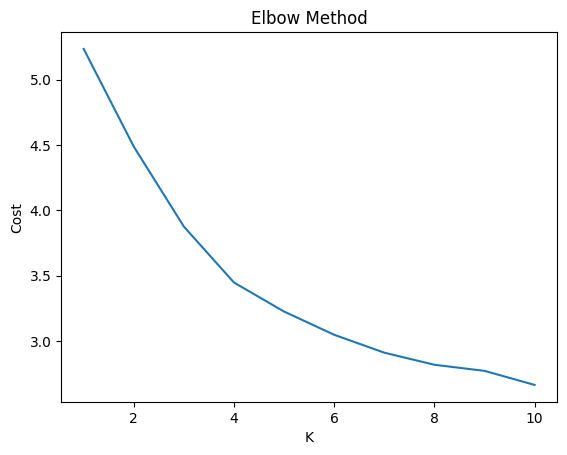

In [168]:
Kvalues=range(1,11)
def Elbow_Method (X):
    costlist=[]
    for k in Kvalues:
        centroids,Address=Kmean_Fit(X,k)
        cost=compute_cost(X,centroids,Address)
        costlist.append(cost)
    return costlist



WCSS=Elbow_Method(X)
plt.plot(Kvalues, WCSS)
plt.xlabel('K')
plt.ylabel('Cost')
plt.title('Elbow Method')
plt.show()


In [174]:
Centroids1,Address=Kmean_Fit(X,K=8,iteration=1000)

In [175]:
UserCluster_Mapping=pd.DataFrame({
    "UserId": userid_Xtraining,
    "ClusterID": Address
})

In [176]:
print(UserCluster_Mapping)

      UserId  ClusterID
0       1122          5
1       4432          4
2       4061          2
3        810          1
4       4582          7
...      ...        ...
4827    3773          4
4828    5192          3
4829    5227          7
4830    5391          3
4831     861          4

[4832 rows x 2 columns]


In [177]:
pca=PCA(n_components=2)
X_PCA=pca.fit_transform(X)
Centroids_PCA=pca.transform(Centroids1)

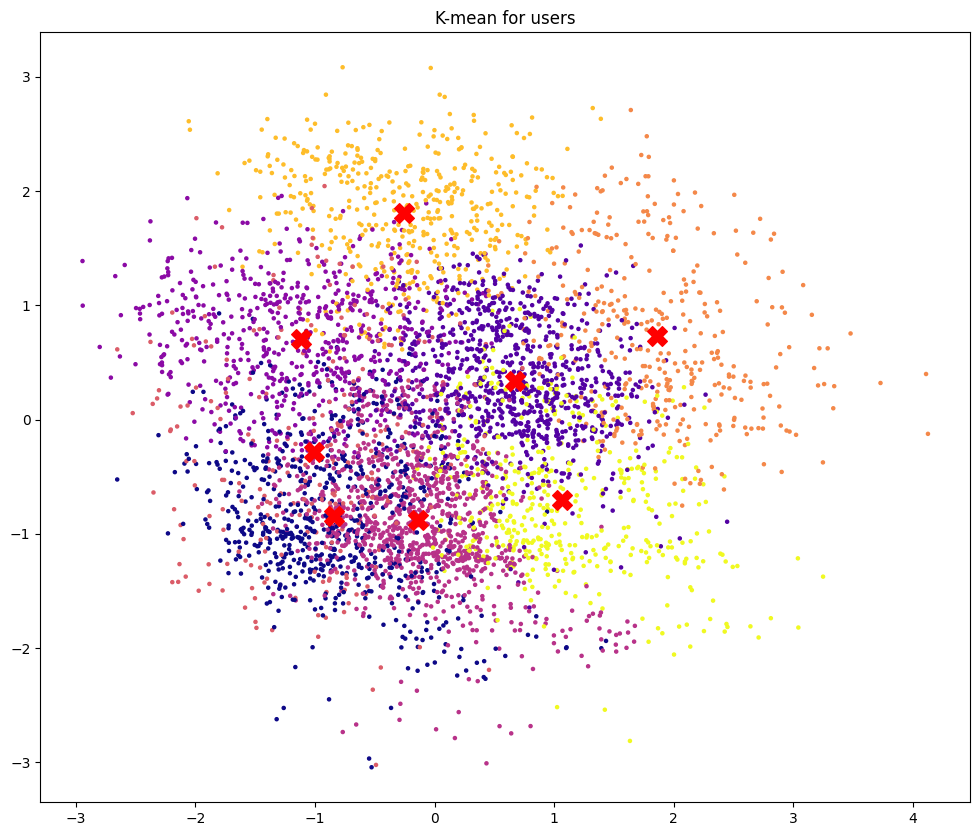

In [178]:
plt.figure(figsize=(12, 10))

plt.scatter(X_PCA[:,0],X_PCA[:,1],c=Address,cmap="plasma", s=5)
plt.scatter(Centroids_PCA[:,0],Centroids_PCA[:,1],c="red",marker="X", s=200)
plt.title("K-mean for users")
plt.show()

In [179]:
'''UserDatascale_test,Userrates_test=prepare_Data(X_test)
xscaled_test=scaler.transform(UserDatascale_test)
x_test=np.hstack((Userrates_test,xscaled_test))'''

'UserDatascale_test,Userrates_test=prepare_Data(X_test)\nxscaled_test=scaler.transform(UserDatascale_test)\nx_test=np.hstack((Userrates_test,xscaled_test))'

In [180]:
UserDatascale_test=X_Kmean_test[["Occupation","Age"]]
userid_Xtest=X_Kmean_test["UserId"].values
X_Kmean_test=X_Kmean_test.drop(["UserId","Occupation","Age"],axis=1)
X_Kmean_test=X_Kmean_test.to_numpy()
scaler=StandardScaler()
xscaled_test=scaler.fit_transform(UserDatascale_test)
X_Kmean_test=np.hstack((X_Kmean_test,xscaled_test))

In [181]:
Address=kmean_prediction(X_Kmean_test,Centroids1)
Usertest_Cluster_Mapping=pd.DataFrame({
       "UserId": userid_Xtest,
       "ClusterID": Address
})

In [183]:
print(UserCluster_Mapping.head())

   UserId  ClusterID
0    1122          5
1    4432          4
2    4061          2
3     810          1
4    4582          7


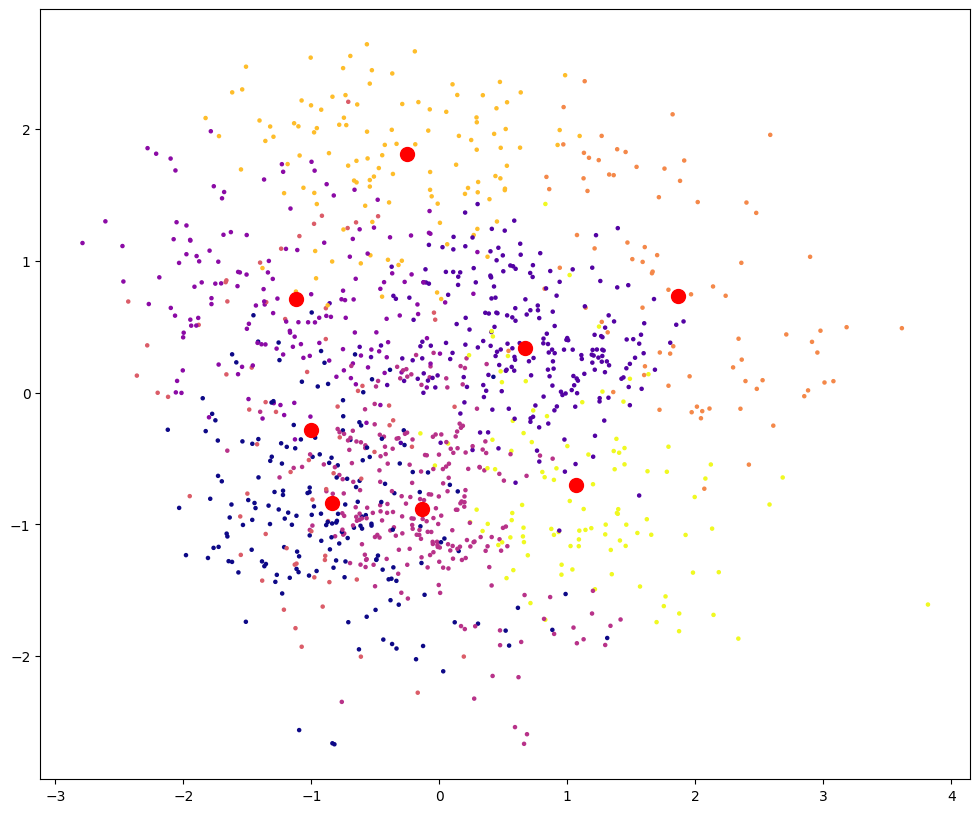

In [182]:
Xtest_PCA=pca.transform(X_Kmean_test)
plt.figure(figsize=(12, 10))
plt.scatter(Xtest_PCA[:,0],Xtest_PCA[:,1],c=Address,cmap="plasma", s=5)
plt.scatter(Centroids_PCA[:,0],Centroids_PCA[:,1],c="red", s=100)


# Draft Area


In [ ]:
'''genre=Xtrain["Genres"].str.get_dummies("|")
gender=pd.get_dummies(Xtrain["Gender"],prefix="Gender",dtype=int)
print(f'Genre {genre.head()}\n Gender {gender.head()}')'''


In [ ]:
'''UserRating=pd.concat([Xtrain.drop(['Genres','Gender'],axis=1),genre,gender],axis=1)
print(UserRating.head())'''

In [ ]:
'''columnsName=[]
for i in genre.columns:
    columnsName.append(i)
print(columnsName)'''


In [ ]:
'''for i in columnsName:
    UserRating[i]= UserRating[i] * UserRating["Rating"]
print(UserRating.head())'''

In [ ]:
'''GenderColumnsName=[]
for gender in gender.columns:
    GenderColumnsName.append(gender)'''

In [ ]:
'''user=UserRating[['UserId',"Occupation","Rating"]+GenderColumnsName+columnsName]
print(user.head())'''

In [ ]:

'''for i in user["UserId"].unique():
    currentrow=user[user['UserId']==i]
    for x in columnsName:


print(UserRating.head())'''

In [ ]:
#print(genre.columns)
'''Userrange=UserRating.groupby("UserId")[genre.columns].mean().reset_index()
print(Userrange.head(2))'''



In [ ]:
'''userinfo=UserRating[["UserId",GenderColumnsName[0],GenderColumnsName[1],"Occupation","Age"]].drop_duplicates()
print(userinfo.head())'''


In [ ]:
'''Userrates=userinfo.merge(Userrange,on='UserId')
print(Userrates.head())'''

In [ ]:
'''print(Userrates.shape)
#Userrates=Userrates.drop(["UserId"],axis=1)
#print(Userrates.head())
UserDatascale=Userrates[["Occupation","Age"]]'''

In [ ]:
'''print(UserDatascale.head())'''

In [ ]:
'''userdatascaled=pd.DataFrame(xscaled,columns=UserDatascale.columns)
print(userdatascaled.head())'''



In [ ]:
'''Userrates=Userrates.drop(["UserId","Occupation","Age"],axis=1)
Userrates=pd.concat([Userrates,userdatascaled],axis=1)
print(Userrates.head())
Userrates=Userrates.drop(["UserId","Occupation","Age"],axis=1)
Userrates=Userrates.to_numpy()'''
